### Organize imports

In [1]:
from gensim.models import Word2Vec
from lib.amazon_model import *
from lib.data_mgmt import *
from nltk.data import find
from sklearn.metrics import roc_curve, auc

import gensim
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

from sklearn.manifold import TSNE

### Set network parameters

In [2]:
# Dataset/Featurization Config
path = 'data/shiet.csv'#'data/full_cols_good_50k.csv'
label = 'good'
max_size = 200
max_tfidf = 12000
n_classes = 2
n_features = 300
test_size = 0.25
verbose = True

# LSTM Config
lstm_size = 50
num_lstm_layers = 2
lstm_dropout = 0.15

# FC Config
fc_layer_sizes = [75, 50, 30]
fc_dropout = 0.10

# Training config
run_name = 'genesisgood_run1'
learning_rate = 1e-3
reg_weight = 1e-5
training_iters = 15000 * 10
batch_size = 15
display_step = 10
save_every = 5000
save_fn = 'chkpts/model_' + run_name + '.ckpt'
should_log_metrics = True

### Set up word embedding model

In [3]:
word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))
we_model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)

### Configure dataset

In [4]:
dataset = Dataset(path, we_model, {
    'label'      : label,
    'max_size'   : max_size,
    'max_tfidf'  : max_tfidf,
    'n_features' : n_features,
    'test_size'  : test_size,
    'verbose'    : verbose
})

n_cols = dataset.get_n_cols() # Number of additional DNN features (including tf-idf features)

Initializing dataset at data/shiet.csv.
Splitting training and test sets.
Building reviewer/ASIN maps.
Fitting tf-idf featurizer.
doc list created: 1000
Tuning tf-idf classifier.


/u/79/lariah1/unix/miniconda3/envs/tf-gpu/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


Featurizing training set.
Featurizing test set.
Finished configuring dataset.


### Compute t-SNE

In [5]:
data = dataset.training_data
data.size()

750

In [6]:
%%time
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(data.tfidf_matrix)

CPU times: user 16.8 s, sys: 596 ms, total: 17.4 s
Wall time: 16.7 s


### Visualize

In [12]:
ineutral = [i for i, entry in enumerate(data.real_labels) if (entry == [0, 0]).all()]
igood = [i for i, entry in enumerate(data.real_labels) if (entry == [1, 0]).all()]
ibad = [i for i, entry in enumerate(data.real_labels) if (entry == [0, 1]).all()]

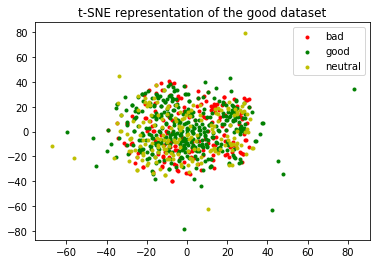

In [14]:
plt.scatter(tsne_results[ibad, 0], tsne_results[ibad, 1], marker='.', c='r', label='bad')
plt.scatter(tsne_results[igood, 0], tsne_results[igood, 1], marker='.', c='g', label='good')
plt.scatter(tsne_results[ineutral, 0], tsne_results[ineutral, 1], marker='.', c='y', label='neutral')
plt.title('t-SNE representation of the good dataset')
plt.legend()

plt.savefig("good.png", bbox_inches='tight', dpi=300)